<a href="https://colab.research.google.com/github/ahadAli102/covid-sentiment-analysis/blob/main/ml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
test_file ='/content/data-collect - Copy.csv'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
data = pd.read_csv(test_file, skipinitialspace=True, engine="python")
data = data.drop(range(0,100))
data.head(10)

,comments,sentiment
100,আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টি...,positive
101,সরকার বিনামূল্যে টিকা দিচ্ছে অথচ এসব উজবুকরা এ...,positive
102,১ম ডোজ দিয়েছেন আজ প্রায় ৪ মাস হলো। ২য় ডোজ দেয়া...,negative
103,ষাটোর্ধ্বদের মৃত্যুঝুঁকি বেশি। তাঁদের বিরাট অং...,neutral
104,এই টিকা নিলে এই হবে সেই হবে... পেট ব্যথায় মরে ...,positive
105,"টিকা নিয়ে আসলো,নাকি অন্যকোনো ভাইরাস নিয়া আসছে ...",neutral
106,যারা এ টিকা গ্রহণ করবে তাদের করোনা থাকবে না কা...,positive
107,ডোজ নিলে হয়তো করোনার থেকে রক্ষা পাওয়া যাবে.,positive
108,মিটফোর্ড এলাকাতে নকল টিকা বানানোর প্রতিযোগিতা ...,negative
109,করোনার টিকা নকল হলেইতো নকলকারীরই লোকসান হবে। ক...,negative


Dataset Preparation

In [ ]:
data.head()

,comments,sentiment
100,আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টি...,positive
101,সরকার বিনামূল্যে টিকা দিচ্ছে অথচ এসব উজবুকরা এ...,positive
102,১ম ডোজ দিয়েছেন আজ প্রায় ৪ মাস হলো। ২য় ডোজ দেয়া...,negative
103,ষাটোর্ধ্বদের মৃত্যুঝুঁকি বেশি। তাঁদের বিরাট অং...,neutral
104,এই টিকা নিলে এই হবে সেই হবে... পেট ব্যথায় মরে ...,positive


In [ ]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.sentiment =='positive']),
      "\nTotal Negative Reviews:",len(data[data.sentiment=='negative']))
      

Total Reviews: 1110 
Total Positive Reviews: 394 
Total Negative Reviews: 601


In [ ]:
data.columns

Index(['comments', 'sentiment'], dtype='object')

In [ ]:
# print some unprocessed reviews
sample_data = [100,150,200,250,600,650]
for i in sample_data:
      print(data.comments[i],'\n','Sentiment:-- ',data.sentiment[i],'\n')

আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টিকা পেয়ে গিয়েছি। 
 Sentiment:--  positive 

চেতনাবাজ বিজ্ঞানীরা পরিক্ষা করে দেখেছেন, এই টিকা বাংলাদেশিরা নিলে গভীর এলার্জিক রিয়েকশন হবে 
 Sentiment:--  negative 

সবাই একসাথে জড়ো হয়ে স্বাস্থ্য বিধি উপেক্ষা করে টিকা নেওয়ার চেষ্টা করবে এতে লাভের চেয়ে ক্ষতিই হবে বেশি। ভাইরাসের জন্যে টিকা নিতে গিয়ে সংগে করে ভাইরাস নিয়ে বাসায় ফেরত আসতে হবে। 
 Sentiment:--  positive 

ভারত টিকা ১টানা ১০ বছর সুরক্ষা দেয়, তাই সবাই ভারতের টিকা দিন 
 Sentiment:--  positive 

তার হজব্যন্ড ও ফাইজারের টিকা নিয়ে মারা গিয়েছেন,ক্যান্সারের পেইশেন্ট। 
 Sentiment:--  negative 

টিকা একটা মরণ ফাদ।জনসংখ্যা কমানোর ধান্দা।এছাড়া আর কিছুইনা 
 Sentiment:--  negative 



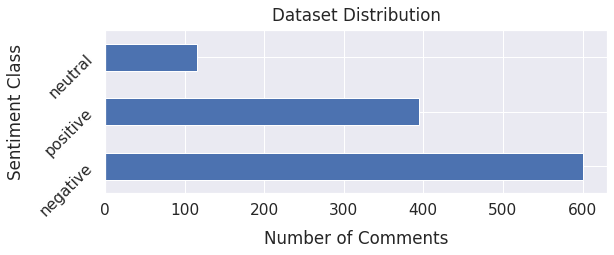

In [ ]:

sns.set(font_scale=1.4)
data['sentiment'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

Data Cleaning

In [ ]:

# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['comments'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [100,854,966]
for i in sample_data:
     print('Original:\n',data.comments[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.sentiment[i],'\n')

Original:
 আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টিকা পেয়ে গিয়েছি। 
Cleaned:
 আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টিকা পেয়ে গিয়েছি  
 Sentiment:--  positive 

Original:
 কে বলছে টিকা নিলে করোনায় আক্রান্ত হবে না! 
Cleaned:
 কে বলছে টিকা নিলে করোনায় আক্রান্ত হবে না  
 Sentiment:--  negative 

Original:
 টিকার উপর কোনো ভরসা নেই 
Cleaned:
 টিকার উপর কোনো ভরসা নেই 
 Sentiment:--  negative 



Remove Low lenght data

In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 1110


Dataset Summary

In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.sentiment.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.sentiment==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.sentiment==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.sentiment==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  negative
Number of Documents:601
Number of Words:5843
Number of Unique Words:1728
Most Frequent Words:

টিকা	530
না	150
করোনা	114
নেওয়ার	74
টিকার	68
পর	65
আক্রান্ত	61
এই	56
আমি	44
মারা	42

Class Name :  positive
Number of Documents:394
Number of Words:4189
Number of Unique Words:1390
Most Frequent Words:

টিকা	363
করোনা	73
হবে	61
না	45
আমি	39
টিকার	37
এই	34
কোন	31
নিলে	29
আমার	28

Class Name :  neutral
Number of Documents:115
Number of Words:1272
Number of Unique Words:683
Most Frequent Words:

টিকা	97
না	30
করোনা	23
কি	16
টিকার	14
আর	11
করে	10
নিয়ে	9
নাকি	9
তা	9
Total Number of Unique Words:2798


Dataset Summary Visualization

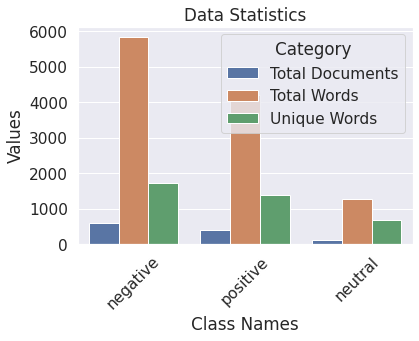

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

Comment Lenght Distribution

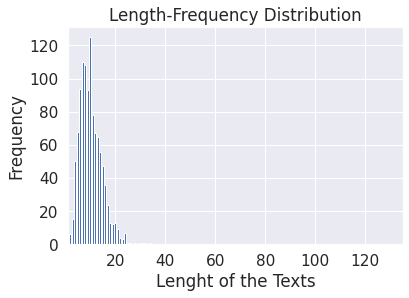

Maximum Length of a review: 34
Minimum Length of a review: 2
Average Length of a reviews: 10.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

Take only Positive and Negative Class for Model Building

In [ ]:
dataset.sentiment.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
stop_words = pd.read_fwf('/content/stop_words.txt')
print(stop_words)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

         অতএব
0         অথচ
1        অথবা
2    অনুযায়ী
3        অনেক
4       অনেকে
..        ...
392     হাজার
393    হিসাবে
394      হৈলে
395       হোক
396        হয়

[397 rows x 1 columns]


**Lable Encoding and Dataset Splitting**

In [ ]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

In [ ]:
dataset.head(50)

,comments,sentiment,cleaned,length,ReviewLength
0,আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টি...,positive,আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টি...,10,10
1,সরকার বিনামূল্যে টিকা দিচ্ছে অথচ এসব উজবুকরা এ...,positive,সরকার বিনামূল্যে টিকা দিচ্ছে অথচ এসব উজবুকরা এ...,11,11
2,১ম ডোজ দিয়েছেন আজ প্রায় ৪ মাস হলো। ২য় ডোজ দেয়া...,negative,১ম ডোজ দিয়েছেন আজ প্রায় ৪ মাস হলো ২য় ডোজ দেয়ার...,19,19
3,ষাটোর্ধ্বদের মৃত্যুঝুঁকি বেশি। তাঁদের বিরাট অং...,neutral,ষাটোর্ধ্বদের মৃত্যুঝুঁকি বেশি তাঁদের বিরাট অংশ...,16,16
4,এই টিকা নিলে এই হবে সেই হবে... পেট ব্যথায় মরে ...,positive,এই টিকা নিলে এই হবে সেই হবে পেট ব্যথায় মরে যাব...,18,18
5,"টিকা নিয়ে আসলো,নাকি অন্যকোনো ভাইরাস নিয়া আসছে ...",neutral,টিকা নিয়ে আসলো নাকি অন্যকোনো ভাইরাস নিয়া আসছে ...,13,13
6,যারা এ টিকা গ্রহণ করবে তাদের করোনা থাকবে না কা...,positive,যারা এ টিকা গ্রহণ করবে তাদের করোনা থাকবে না কা...,13,13
7,ডোজ নিলে হয়তো করোনার থেকে রক্ষা পাওয়া যাবে.,positive,ডোজ নিলে হয়তো করোনার থেকে রক্ষা পাওয়া যাবে,8,8
8,মিটফোর্ড এলাকাতে নকল টিকা বানানোর প্রতিযোগিতা ...,negative,মিটফোর্ড এলাকাতে নকল টিকা বানানোর প্রতিযোগিতা ...,9,9
9,করোনার টিকা নকল হলেইতো নকলকারীরই লোকসান হবে। ক...,negative,করোনার টিকা নকল হলেইতো নকলকারীরই লোকসান হবে কে...,21,21


Model Building Using Machine Learning
Feature Extraction Using TF-IDF 

In [ ]:
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
  
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    
    lr_model = LogisticRegression(random_state = 123)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Random Forest','KNN','Kernel SVM']
    ml_models = [lr_model,rf_model,knn_model,ksvm_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average = "micro"),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average = "macro"),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average = 'weighted'),4)*100 
    
    return my_dict  
            
def performance_table(performance_dict):
    
    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['Logistic Regression','Random Forest','KNN','Kernel SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df


Model Training

In [ ]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.sentiment,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file


Feature Size :======> 2798

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1110 
	Training		 999 
	Test			 111
Feature Size :======> 10307

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1110 
	Training		 999 
	Test			 111
Feature Size :======> 18686

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1110 
	Training		 999 
	Test			 111


In [ ]:
accuracy

{'Logistic Regression': {'Accuracy': 62.160000000000004,
  'Precision': 62.160000000000004,
  'Recall': 41.65,
  'F1 Score': 54.96},
 'Random Forest': {'Accuracy': 61.260000000000005,
  'Precision': 61.260000000000005,
  'Recall': 41.07,
  'F1 Score': 54.53},
 'KNN': {'Accuracy': 63.06,
  'Precision': 63.06,
  'Recall': 47.81,
  'F1 Score': 61.9},
 'Kernel SVM': {'Accuracy': 52.25,
  'Precision': 52.25,
  'Recall': 33.33,
  'F1 Score': 35.870000000000005}}

Performance Table

In [ ]:

#Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score           Model Name
0     62.16      62.16   41.65     54.96  Logistic Regression
1     61.26      61.26   41.07     54.53        Random Forest
2     63.06      63.06   47.81     61.90                  KNN
3     52.25      52.25   33.33     35.87           Kernel SVM

========In case of Unigram feature:========

Highest Accuracy achieved by KNN at = 63.06
Highest F1-Score achieved by KNN at = 61.9
Highest Precision Score achieved by KNN at = 63.06
Highest Recall Score achieved by KNN at = 47.81

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score           Model Name
0     62.16      62.16   41.65     54.96  Logistic Regression
1     61.26      61.26   41.07     54.53        Random Forest
2     63.06      63.06   47.81     61.90                  KNN
3     52.25      52.25   33.33     35.87           Kernel SVM

========In case of Bigram feat

Performance Visualization

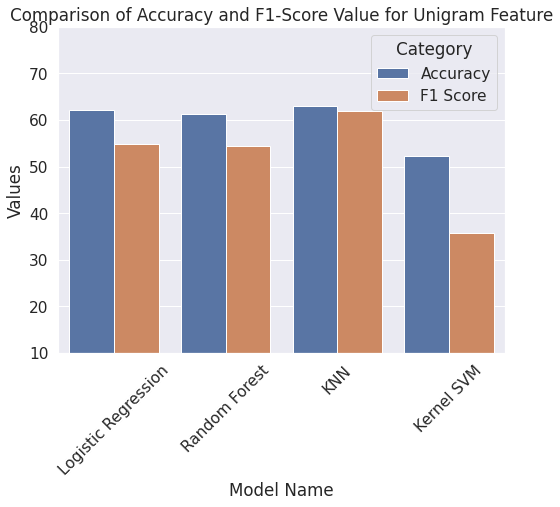

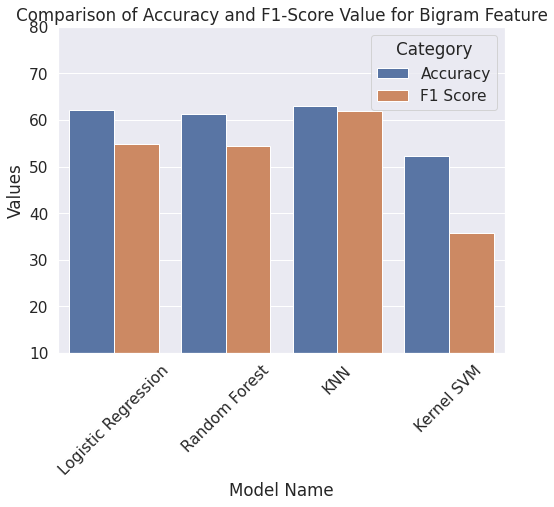

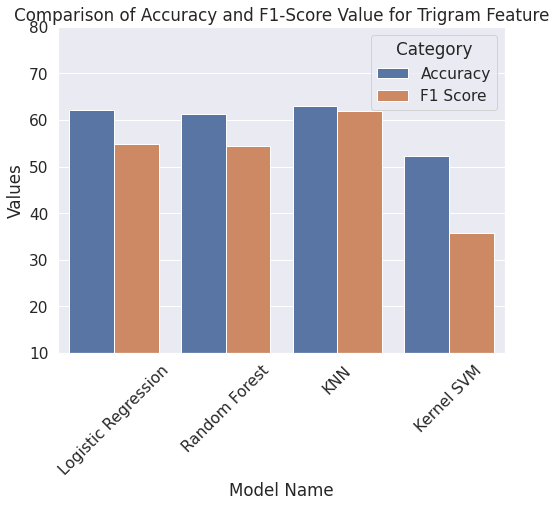

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);